# Bivariate BMM Test: Taweret v.0.1.0

### Author: Alexandra Semposki

### Date: 10 October 2022

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

#matplotlib settings for Latex plots
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
})

In [2]:
import sys
sys.path.append('../Taweret')

In [3]:
from models.samba_models import *
from mix.gaussian import *

In [4]:
g = np.linspace(1e-6, 1.0, 100)
order = 3

In [5]:
model_1 = loworder(order)
model_2 = highorder(order)
true = true_model().predict(g)

exp_1 = model_1.predict(g)
exp_2 = model_2.predict(g)

var_1 = exp_1[1].flatten()
var_2 = exp_2[1].flatten()

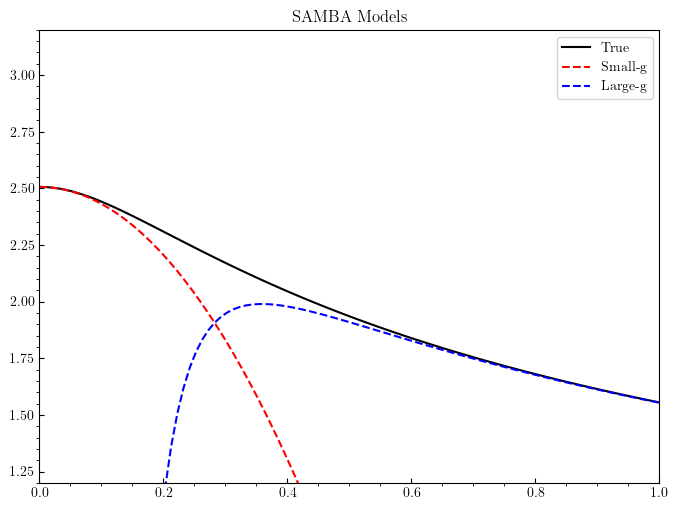

In [6]:
#example plot to test models
fig = plt.figure(figsize=(8,6), dpi=100)
ax = plt.axes()
ax.set_xlim(0.0,1.0)
ax.set_ylim(1.2,3.2)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.locator_params(nbins=8)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.plot(g, true[0].flatten(), 'k', label='True')
ax.plot(g, exp_1[0].flatten(), 'r--', label='Small-g')
ax.plot(g, exp_2[0].flatten(), 'b--', label='Large-g')

ax.set_title('SAMBA Models')
ax.legend()

In [7]:
#call mixing method and plot
mixed = bivariate(g, model_1, model_2)
mixed_mean, mixed_intervals = mixed.mixing_prediction()

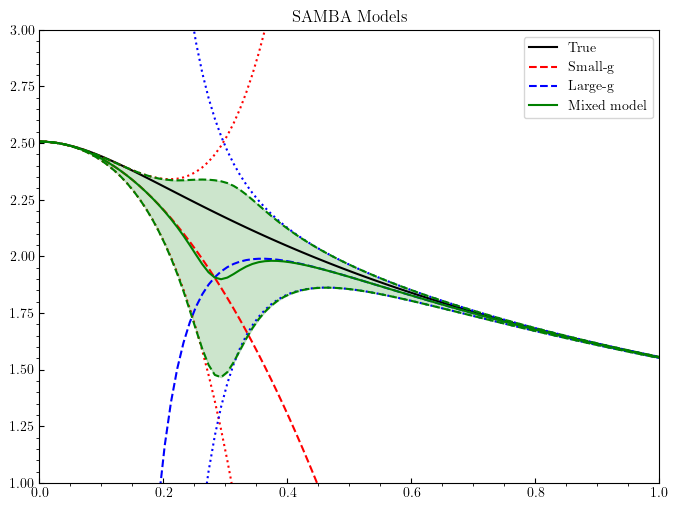

In [8]:
#plotting bivariate BMM results on top of SAMBA models
fig = plt.figure(figsize=(8,6), dpi=100)
ax = plt.axes()
ax.set_xlim(0.0,1.0)
ax.set_ylim(1.0,3.0)
ax.tick_params(axis='x', direction='in')
ax.tick_params(axis='y', direction='in')
ax.locator_params(nbins=8)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.plot(g, true[0].flatten(), 'k', label='True')
ax.plot(g, exp_1[0].flatten(), 'r--', label='Small-g')
ax.plot(g, exp_2[0].flatten(), 'b--', label='Large-g')

ax.plot(g, exp_1[0].flatten() - var_1, 'r', linestyle='dotted')
ax.plot(g, exp_1[0].flatten() + var_1, 'r', linestyle='dotted')

ax.plot(g, exp_2[0].flatten() - var_2, 'b', linestyle='dotted')
ax.plot(g, exp_2[0].flatten() + var_2, 'b', linestyle='dotted')

ax.plot(g, mixed_mean, 'g', label='Mixed model')
ax.plot(g, mixed_intervals[:,0], 'g--')
ax.plot(g, mixed_intervals[:,1], 'g--')
ax.fill_between(g, mixed_intervals[:,0], mixed_intervals[:,1], color='green', alpha=0.2)

ax.set_title('SAMBA Models')
ax.legend()